# Question:
# What is the optimal initial orbital velocity for a Hoffman transfer from earth's orbit to a mars intercept?
Getting from earth to mars is difficult, and doing it efficiently is essential for a mars mission. One of the most efficient method is the Hoffman transfer. The Hoffman transfer, starts from Low Earth Orbit (LEO) and does a single burn with enough velocity to exit Earth’s sphere of influence (a sphere of influence is the location were an object, usually a planet, has the most gravitational influence on another object). The spacecraft then exits the earth sphere of influence with enough velocity so that the apogee of the new elliptical orbit around the sun is equal to that of the orbit of mars (Fig 1). The launch is timed so that the spacecraft reaches that location at the same time as mars for the intercept. The rocket is then in a position to burn retrograde and land on Mars. The goal of this project is to find the initial position and velocity required for an intercept with mars so that we can efficiently get copepods to mars.

<img src="mark transfer.PNG" style="width: 600px;"/>


Fig 1: Diagram of the Hoffman transfer showing the locations of each planet at launch and intercept 

<img src="Capture.PNG" style="width: 600px;"/>

Fig 2: Diagram showing the initial orbit relative to earth


# Model:
The following code sets up the orbital system, with earth and mars each orbiting the sun. It does this by taking the distance from the origin (the sun) of each planet and uses that to calculate the force on each planet using the equation Fg=Gm1m2/r^2, it then gives each object an initial position and velocity based on the true values. This gives a good approximation of the orbits of each planet. The spacecraft uses the same design, though it is influenced by every object. It starts out at LEO, then the code will sweep through initial velocities to get an intercept with mars.

# Assumptions:
- Orbit of the earth relative to mars is on a single plane
- The change in velocity due to the first burn is instantaneous
- The gravity of the Moon does not influence the rocket
- The gravity of Phobos and Deimos the moons of mars do not influence the rocket
- The mass of the rocket is constant
- Newtonian physics
- The launch occurs at an optimal time for the Hoffman transfer



In [1]:
# vpython is a library that provides the animation capabilitys as well as a vector library
from vpython import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

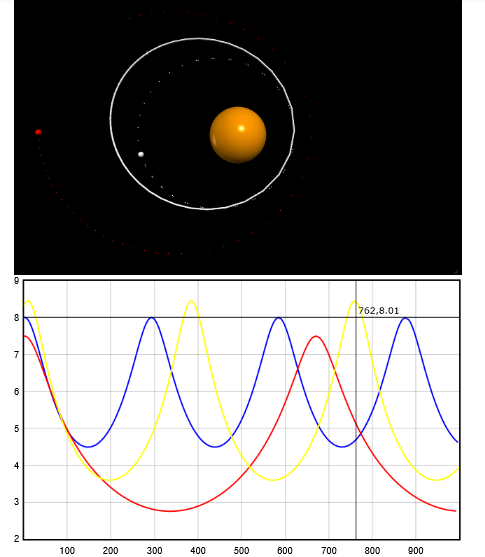

In [2]:
# defines initial positions of each object 
Sun = sphere(pos=vector(0,0,0), radius = 50, color = color.orange)
Earth = sphere(pos=vector(-200, 255.377,0), radius = 10, color = color.blue, make_trail=True, trail_type="points",
              interval=10, retain=100)
Mars = sphere(pos=vector(-459.016,-285.246,0), radius = 10, color = color.red, make_trail=True, trail_type="points",
              interval=10, retain=100)
Rocket = arrow(pos=vector(-198.819,256.302,0), axis=vector(5,0,0), shaftwidth=10,  make_trail =  True,
              interval=10, retain=100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# setting up the animation and defineing constants
def setup(Rxv, Ryv):
    scene2 = canvas(title='Mark goes to mars',
     center=vector(0,0,0),background=color.black)
    scene.camera.follow(Rocket)
    Earth.pos.x =-200
    Earth.pos.y = 255
    Earth.pos.z = 0
    Mars.pos.x =-459.016
    Mars.pos.y = -285.246
    Mars.pos.z = 0
    Rocket.pos.x =-200
    Rocket.pos.y = 235.377
    Rocket.pos.z = 0
    Earthv = vector(-.051,-.04037,0)
    Marsv = vector(.02799,-.04504, 0)
    Rocketv = vector(Rxv, Ryv,0)
    tf = 30000
    dt = 1.2
    G_const = 1
    # Mearth, Mmars, Mrocket, Msun = 5.972*10**24, 0.64*10**24, 4000 ,1.989*10**30
    Mearth, Mmars, Mrocket, Msun = 1,1,1,1
    f1 = gcurve(color = color.blue)
    f2 = gcurve(color = color.red)
    f3 = gcurve(color = color.yellow)
    return Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun, f1, f2, f3

In [4]:
# equations for the orbit of earth and mars around the sun
def Rotation(t1,t2,Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun):
    Edist = (Earth.pos.x**2 + Earth.pos.y**2 + Earth.pos.z**2) ** 0.5
    Mdist = (Mars.pos.x**2 + Mars.pos.y**2 + Mars.pos.z**2) ** 0.5
    EradialVector = (Sun.pos - Earth.pos)/Edist
    MradialVector = (Sun.pos - Mars.pos)/Mdist
    EFgrav = (dt)*EradialVector/Edist**2
    MFgrav = (dt)*MradialVector/Mdist**2
    Earthv += EFgrav
    Marsv += MFgrav
    Earth.pos += Earthv
    Mars.pos += Marsv
    return Earthv, Marsv, Earth.pos, Mars.pos

In [5]:
def run_rotation(Rotation,tf):
    t1 = 0
    t2 = 0
    for i in range(tf):
        rate(4000)
        Rotation(t1,t2,dt)
        t1 += 1
        t2 += 1 
#         if Edist <= Sun.radius: break
#         if Mdist <= Sun.radius: break
        f1.plot(pos = (t1,mag(Earthv)))
        f2.plot(pos = (t2,mag(Marsv)))

In [6]:
# run_rotation(Rotation, tf)

In [7]:
# equations for the forces on the rocket 
def Rocket_dynam(t3, Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun):
    distances = []
    Rdist_s = (Rocket.pos.x**2 + Rocket.pos.y**2 + Rocket.pos.z**2) ** 0.5
    Rdist_e = ((Rocket.pos.x-Earth.pos.x)**2 + (Rocket.pos.y-Earth.pos.y)**2 + (Rocket.pos.z-Earth.pos.z)**2) ** 0.5  
    Rdist_m = ((Rocket.pos.x-Mars.pos.x)**2 + (Rocket.pos.y-Mars.pos.y)**2 + (Rocket.pos.z-Mars.pos.z)**2) ** 0.5  
    R_S_radialVector = (Sun.pos - Rocket.pos)/Rdist_s
    R_E_radialVector = (Earth.pos - Rocket.pos)/Rdist_e
    R_M_radialVector = (Mars.pos - Rocket.pos)/Rdist_m
    R_S_Fgrav = (Msun*G_const*dt)*R_S_radialVector/Rdist_s**2
    R_E_Fgrav = (3.002*10**-6)*R_E_radialVector/Rdist_e**2
    R_M_Fgrav = (3.217*10**-7)*R_M_radialVector/Rdist_m**2
    Rocketv += R_S_Fgrav+ R_E_Fgrav + R_M_Fgrav
    Rocket.pos += Rocketv
    return Rocketv, Rocket.pos, Rdist_m

In [8]:
def run_rotation_rocket(Rotation, Rocket_dynam, tf, Earthv, Marsv, Rocketv, dt, G_const, Mearth, Mmars, Mrocket, Msun, f1, f2, f3):
    global t1 
    global t2
    global t3 
    distances=[]
    times = []
    t1 = 0
    t2 = 0
    t3 = 0
    for i in range(tf):
        rate(4000)
        Earthv, Marsv, Earth.pos, Mars.pos = Rotation(t1,t2,Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun)
        t1 += 1
        t2 += 1 
        Rocketv, Rocket.pos, Rdist_m = Rocket_dynam(t3,Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun)
        t3 += 1
#         if Edist <= Sun.radius: break
#         if Mdist <= Sun.radius: break
#         f1.plot(pos = (t1,mag(Earthv)))
#         f2.plot(pos = (t2,mag(Marsv)))
        distances.append(Rdist_m)
        times.append(t3)
        f3.plot(pos = (t3,Rdist_m))
        
    return times, distances

In [9]:
# sweeping through initial velocities 
def looper_hoffman(setup, run_rotation_rocket):
    distance_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    Xv = np.linspace(-.03865342844078646   , -0.03864903155006858, num=10)#Attempted hoffman  
    Yv = np.linspace(-.06102518518518518, -.0655125925925926, num=10) #Attempted hoffman  
    t_list = np.linspace(0, 1.6, num= 16000)
    for j in range(10):
        Earthv, Marsv, Rocketv, tf, dt, G_const, Mearth, Mmars, Mrocket, Msun, f1, f2, f3 = setup(Xv[j], Yv[j])
        times, distances = run_rotation_rocket(Rotation, Rocket_dynam, tf, Earthv, Marsv, Rocketv, dt, G_const, Mearth, Mmars,  Mrocket, Msun, f1, f2, f3)
        distance_list[j].append(distances)
    for k in range(10):
        print(min(min(distance_list[k])),' ', Xv[k] ,' ',Yv[k])

In [0]:
looper_hoffman(setup, run_rotation_rocket)

# Results:
The results are an animated model of the spacecraft, earth, and mars showing the spacecraft escaping earth gravity and going into an elliptical orbit that intercepts mars. It also shows a graph with the position relative to mars versus time for each iteration with the final iteration showing an intercept with mars.
Video of the animation: https://youtu.be/fzFrMhm7uw0
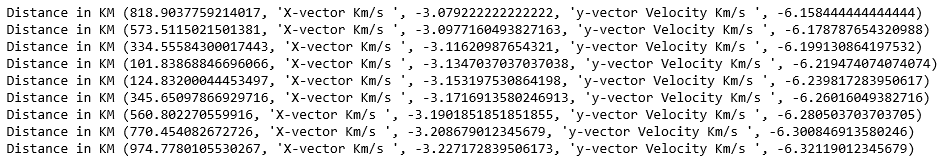

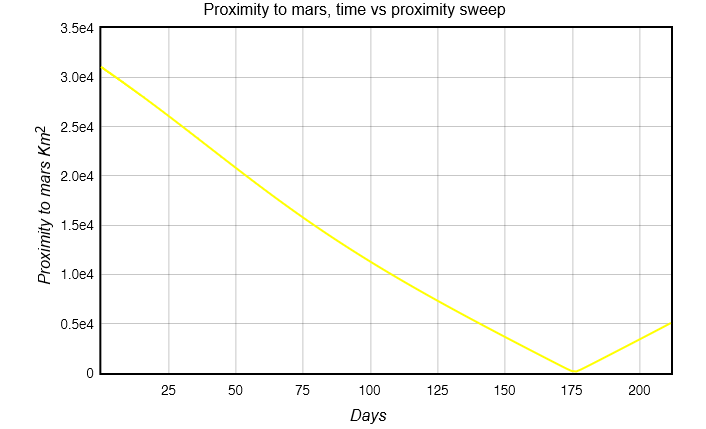

# Interpretation:
Our results reveal that a velocity of a rocket should be around 6.9 Km/s relative to earth to reach mars. Though not very precise it does seem to agree with the around 7 Km/s velocity that NASA proposes for the mission. 
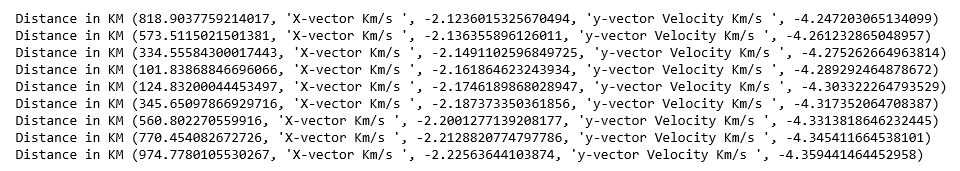